In [1]:
import matplotlib.pyplot as plt
import cv2

from skimage.feature import greycomatrix, greycoprops

In [2]:
sky_locations=[(288, 37), (81, 37), (151, 127), (238, 172), (403, 170), (501, 170), (511, 47), (336, 9), (173, 14), (173, 14)]
sky_test=[(41, 92), (41, 198), (151, 217), (230, 143), (176, 62)]
sky_test1=[(288, 37), (81, 37), (151, 127)]

grass_locations=[(400, 366), (225, 320), (163, 365), (111, 300), (26, 377), (26, 283), (264, 356), (446, 378), (532, 264), (567, 359)]
grass_test=[(548, 385), (487, 342), (443, 310), (378, 291), (88, 278)]
grass_test1=[(400, 366), (225, 320), (163, 365)]


"distances" is a list of distances (in pixels) between the pixels being compared

"angles" is a list of angles (in radians) between pixels being compared

"levels" are the grey levels counted from the input image

A grey level co-occurrence matrix is a histogram of co-occurring greyscale values at a given offset over an image.



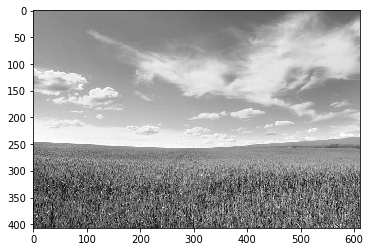

In [3]:
PATCH_SIZE = 20
image = cv2.imread("image_gray.jpg",0)
plt.imshow(image ,cmap='gray')        
plt.show()   

In [4]:
image.shape

(407, 612)

In [5]:
import numpy as np
grass_patches=[]
for loc in grass_test1:
    grass_patches.append(image[loc[1]:loc[1] + PATCH_SIZE,loc[0]:loc[0] + PATCH_SIZE])
    
sky_patches=[]
for loc in sky_test1:
     sky_patches.append(image[loc[1]:loc[1] + PATCH_SIZE,loc[0]:loc[0] + PATCH_SIZE])

x=[]    
xs = []
y = []


for patch in (grass_patches):
    xs=[]
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    #glcm = greycomatrix(patch, [1, 2], [0, np.pi/2], 256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'contrast')[0,0])
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    xs.append(greycoprops(glcm, 'homogeneity')[0, 0])
    xs.append(greycoprops(glcm, 'ASM')[0, 0])
    xs.append(greycoprops(glcm, 'energy')[0, 0])
    xs.append(greycoprops(glcm, 'correlation')[0, 0])
    x.append(xs)
    y.append([1])
    
print (x[1])

print y
    

[2253.73, 38.723333333333329, 0.024125063091868654, 0.0017500000000000003, 0.041833001326703784, 0.0038163595538323928]
[[1], [1], [1]]


In [6]:
for patch in (sky_patches):
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    xs=[]
    xs.append(greycoprops(glcm, 'contrast')[0,0])  
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    xs.append(greycoprops(glcm, 'homogeneity')[0, 0])
    xs.append(greycoprops(glcm, 'ASM')[0, 0])
    xs.append(greycoprops(glcm, 'energy')[0, 0])
    xs.append(greycoprops(glcm, 'correlation')[0, 0])
    x.append(xs)
    y.append([0])
    
print len(x)
print len(x[0])
#6 columns and 10 rows matrix
print x


print y

6
6
[[2221.02, 37.313333333333333, 0.035112922744846557, 0.0018055555555555561, 0.042491829279939879, 0.0015333859523680847], [2253.73, 38.723333333333329, 0.024125063091868654, 0.0017500000000000003, 0.041833001326703784, 0.0038163595538323928], [2599.9200000000001, 40.853333333333339, 0.025304472359330196, 0.0017777777777777783, 0.0421637021355784, 0.0053314514418818836], [2.29, 0.94999999999999996, 0.64694570135746621, 0.0339, 0.1841195263952197, 0.94520271870024375], [2.8733333333333331, 1.0733333333333333, 0.60384771102206791, 0.098805555555555535, 0.31433351007418148, 0.3520615767002746], [2.7966666666666669, 1.0766666666666667, 0.59308592927457027, 0.029127777777777777, 0.17066861978049092, 0.88901115642922834]]
[[1], [1], [1], [0], [0], [0]]


In [7]:
grass_patches[1].shape

(20, 20)

In [8]:
with open('test.csv', 'w+') as f:
    f.writelines("contrast , dissimilarity ,homogeneity, ASM,energy,correlation,class"+"\n")
    for j in range(0,6,1):
        a=y[j][0]
        x[j].append(a)
        print x[j]
        print ","
        f.writelines(str(x[j]))
        f.writelines("\n") 
          
    
    

[2221.02, 37.313333333333333, 0.035112922744846557, 0.0018055555555555561, 0.042491829279939879, 0.0015333859523680847, 1]
,
[2253.73, 38.723333333333329, 0.024125063091868654, 0.0017500000000000003, 0.041833001326703784, 0.0038163595538323928, 1]
,
[2599.9200000000001, 40.853333333333339, 0.025304472359330196, 0.0017777777777777783, 0.0421637021355784, 0.0053314514418818836, 1]
,
[2.29, 0.94999999999999996, 0.64694570135746621, 0.0339, 0.1841195263952197, 0.94520271870024375, 0]
,
[2.8733333333333331, 1.0733333333333333, 0.60384771102206791, 0.098805555555555535, 0.31433351007418148, 0.3520615767002746, 0]
,
[2.7966666666666669, 1.0766666666666667, 0.59308592927457027, 0.029127777777777777, 0.17066861978049092, 0.88901115642922834, 0]
,
